In [4]:
ls /nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkb_iter_23328*

/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkb_iter_23328.nc


In [1]:
import os
folder='/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields'
arr = [filename for filename in os.listdir(folder) if filename.startswith('llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter')]


In [2]:
import xarray as xr
import kerchunk.hdf
import fsspec
import ujson

In [4]:


urls = ["/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/" + p for p in arr]
so = dict(
    anon=True, default_fill_cache=False, default_cache_type='first'
)
singles = []
fs2 = fsspec.filesystem('')

for u in urls:
    print(u)
    with fsspec.open(u, **so) as inf:
        h5chunks = kerchunk.hdf.SingleHdf5ToZarr(inf, u, inline_threshold=100)
        #singles.append(h5chunks.translate())
        ##
        #variable = u.split('/')[-1].split('.')[0]
        iter = u.split('/')[-1].split('.')[0].split('_')[-1]
        outf = f'/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_json/surfa_face1_chunkc_{iter}.json' #file name to save json to
        with fs2.open(outf, 'wb') as f:
            f.write(ujson.dumps(h5chunks.translate()).encode());

/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_19872.nc
/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_17136.nc
/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_14832.nc
/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_17712.nc
/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_15264.nc
/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_22032.nc
/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_fields/llc4320_Eta-U-V-W-Theta-Salt_f1_k0_chunkc_iter_2

In [4]:
h5chunks

In [5]:
json_list = fs2.glob("/nobackup/csjone15/pleiades_llc_recipes/python_cli_data_export/surf_extract/surf_json/surfa_face1_chunkb_*.json")

In [6]:
from kerchunk.combine import MultiZarrToZarr

mzz = MultiZarrToZarr(json_list,
    remote_options={'anon':True},
    concat_dims=['time'])

d = mzz.translate()

backend_args = {"consolidated": False, "storage_options": {"fo": d,"remote_options": {"anon": True}}}
print(xr.open_dataset("reference://", engine="zarr", backend_kwargs=backend_args))

<xarray.Dataset>
Dimensions:  (time: 100, face: 1, j: 4320, i: 4320, k: 1, i_g: 4320, j_g: 4320,
              k_l: 1, k_p1: 2, k_u: 1)
Coordinates:
  * face     (face) float64 1.0
  * i        (i) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * i_g      (i_g) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * j_g      (j_g) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * k        (k) float64 0.0
  * k_l      (k_l) float64 0.0
  * k_p1     (k_p1) float64 0.0 1.0
  * k_u      (k_u) float64 0.0
    niter    (time) float64 ...
  * time     (time) datetime64[ns] 2011-09-13T01:00:00 ... 2011-09-17T04:00:00
Data variables:
    Eta      (time, face, j, i) float32 ...
    Salt     (time, k, face, j, i) float32 ...
    Theta    (time, k, face, j, i) float32 ...
    U        (time, k, face, j, i_g) float32 ...
    V        (time, k, face, j_g, i) float32 ...
    W        (time, k_l, 

In [4]:
from kerchunk.combine import MultiZarrToZarr
import ujson
mzz = MultiZarrToZarr(
    singles,
    remote_options={'anon': True},
    concat_dims=["time"]
)

out = mzz.translate()
fs2 = fsspec.filesystem('')

with fs2.open('surf_fields_test.json', 'wb') as f:
    f.write(ujson.dumps(out).encode())

In [5]:
ds = xr.open_dataset(
    "reference://", engine="zarr",
    backend_kwargs={
        "storage_options": {
            "fo": 'surf_fields_test.json',
            "remote_options": {"anon": True}
        },
        "consolidated": False
    }
)

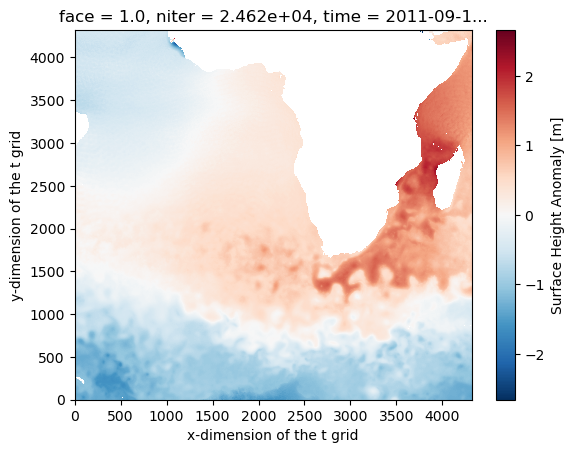

In [8]:
ds.Eta.isel(time=98).plot()

In [ ]:
ds.Eta.isel(j=20).plot()

In [7]:
ds

<xarray.Dataset>
Dimensions:  (time: 100, face: 1, j: 4320, i: 4320, k: 1, i_g: 4320, j_g: 4320,
              k_l: 1, k_p1: 2, k_u: 1)
Coordinates:
  * face     (face) float64 1.0
  * i        (i) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * i_g      (i_g) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * j_g      (j_g) float64 0.0 1.0 2.0 3.0 ... 4.317e+03 4.318e+03 4.319e+03
  * k        (k) float64 0.0
  * k_l      (k_l) float64 0.0
  * k_p1     (k_p1) float64 0.0 1.0
  * k_u      (k_u) float64 0.0
    niter    (time) float64 ...
  * time     (time) datetime64[ns] 2011-09-13T01:00:00 ... 2011-09-17T04:00:00
Data variables:
    Eta      (time, face, j, i) float32 ...
    Salt     (time, k, face, j, i) float32 ...
    Theta    (time, k, face, j, i) float32 ...
    U        (time, k, face, j, i_g) float32 ...
    V        (time, k, face, j_g, i) float32 ...
    W        (time, k_l, face, j, i) float32 ...